In [ ]:
# ---> TODO: review theory of all?

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
rng=np.random.default_rng(seed=16)

C:\Users\Libero\AppData\Local\Temp\ipykernel_10080\2203591576.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


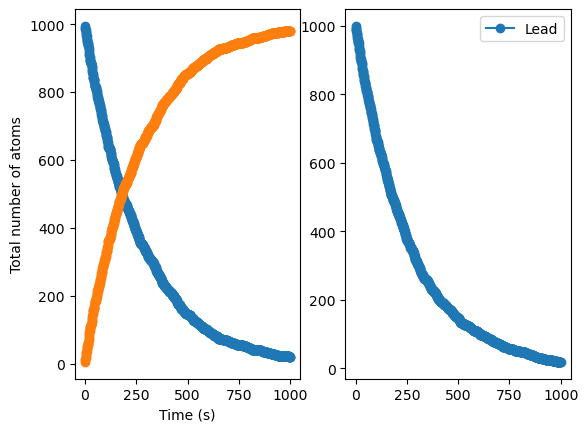

In [22]:
n_th=1000
n_pb=0
hl=3.052*60 # ---> in seconds
tot_t=1000
evolution=np.zeros((2,tot_t))
def prob(tau):
    return 1-2**(-1/tau) # ---> NB this: prob of decaying in the next second, so simply 1/tau
n_th_max=-1
for t in range(tot_t):
    probi=prob(tau=hl)
    n_decayed=rng.binomial(n_th, probi) # ---> NB this!
    n_th-=n_decayed
    n_pb+=n_decayed
    #print(n_th)
    evolution[:,t]=np.array([n_th,n_pb])
    if (n_th == 0):
        break #---> exit for loop
t_max=t+1
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(range(t_max), evolution[0,:t_max], 'o-', label="Thallium")
ax1.plot(range(t_max), evolution[1,:t_max], 'o-', label="Lead")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Total number of atoms")
plt.legend()

n_th=1000
def quantile(tau, n_samples):
    # ---> NB would have to compute its CDF by hand,
    # and set it equal to uniform distr (general result); 
    # but here CDF is given in the previous ex,
    # just have to take the inverse easily
    return -tau*np.log2(1-rng.uniform(0,1,n_samples))
ts_of_decay=np.sort(quantile(tau=hl,n_samples=n_th))
#print(ts_of_decay[:10])
evolution_t=np.zeros(tot_t)
evolution_t[0]=n_th
for t in range(tot_t):
    n_alive = np.sum(ts_of_decay > t) # ---> NB this, simply (sums boolean values)
    evolution_t[t]=n_alive
    if (n_th == 0):
        break 
t_max=t+1
ax2.plot(range(t_max), evolution_t[:t_max], 'o-', label="Lead")
ax1.set_xlabel("Time (s)")
plt.legend()
plt.show()
# ---> TODO: plot title of each, and legend in first? fit with exponential?

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{(\frac{1}{2} \theta)} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [8]:
# ---> NB: see notes for theory
Z=79
E=7.7*(1e6)
n=int(1e6)
const=Z*(sp.constants.e)/(2*sp.constants.pi * sp.constants.epsilon_0 * E)
a_0=sp.constants.physical_constants['Bohr radius'][0]
#print(const)
x=rng.normal(0, a_0/100, size=n)
y=rng.normal(0, a_0/100, size=n)
b=np.sqrt(x**2 + y**2)

fraction=np.sum(b<const)/n # ---> correct
print(fraction)

0.001585


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate

In [16]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2
N=int(1e5)
n=10
I_ar=[]
for j in range(n):
    count=0
    for i in range(N):
        x=2*np.random.random() # ---> uniform distribution between 0 and 1, rescaled
        y=np.random.random()
        if y<f(x): count+=1
    I=2*count/N
    I_ar.append(I)
print(I_ar)
I=np.mean(I_ar)
unc=np.var(I_ar)
# ---> or, use given simple formula (see my notes)?
print(I, unc)

[1.4449, 1.4514, 1.45056, 1.45094, 1.45064, 1.4541, 1.45022, 1.45096, 1.453, 1.45216]
1.45216 5.3136959999998725e-06


* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [20]:
b=2
a=0
I_ar=[]
for j in range(n):
    summation=0
    for i in range(N):
        x=2*np.random.random()
        summation+=f(x)
    I=(b-a)/N * summation
    I_ar.append(I)
I=np.mean(I_ar)
unc=np.var(I_ar)
# ---> or, use given formula (see 10)?
print(I,unc)
# ---> half the uncertainty as before

1.4520652988415363 2.460935379090282e-06


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [41]:
def d_sphere(x:np.ndarray):
    r_sq=np.sum(x**2)
    if (r_sq<=1): return 1
    else: return 0
n=10
N=int(1e5)
d=10
b=1
a=-1 # --->NB this
V=(b-a)**d
I_ar=[]
for j in range(n):
    summation=0
    for i in range(N):
        x=2*np.random.random(size=d)-1
        summation+=d_sphere(x)
    I=V/N * summation
    I_ar.append(I)
I=np.mean(I_ar)
unc=np.var(I_ar)
# ---> or, use given formula (see 10)? 
print(I,unc)

2.479104 0.023749197824000028


In [40]:
print(4/3*np.pi)
print((np.pi)**5/120)

4.1887902047863905
2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [50]:
def f(x):
    return (x**(-0.5))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)
w_int= 2 # ---> easy by hand
N=int(1e5)
n=10
b=1
a=0 # --->NB this
V=(b-a)
I_ar=[]
for j in range(n):
    x=np.random.random(size=N)**2 # ---> NB have to sample from distribution proportional to w (inverse transform method; see my notes)
    summation=np.sum(f(x)/w(x)) # ---> element wise
    I=V/N * w_int * summation
    I_ar.append(I)
I_m=np.mean(I_ar)
I_unc=np.var(I_ar)
print(I_m, I_unc)
# ---> TODO: plot them?

0.8390169078609855 1.6241694092770644e-07
